## Circuit creation and simulation in ideal simulator

In [1]:
L = 4
J = 1
h = 0.05
lamb = 0.5

particle_pair_left_position = 1
particle_pair_length = 1

final_time = 5
layers = 50

In [2]:
import z2chain.circs as circs

circs_arr = circs.particle_pair_quench_simulation_circuits(L, J, h, lamb, particle_pair_left_position, particle_pair_length, 1, 2, 1)

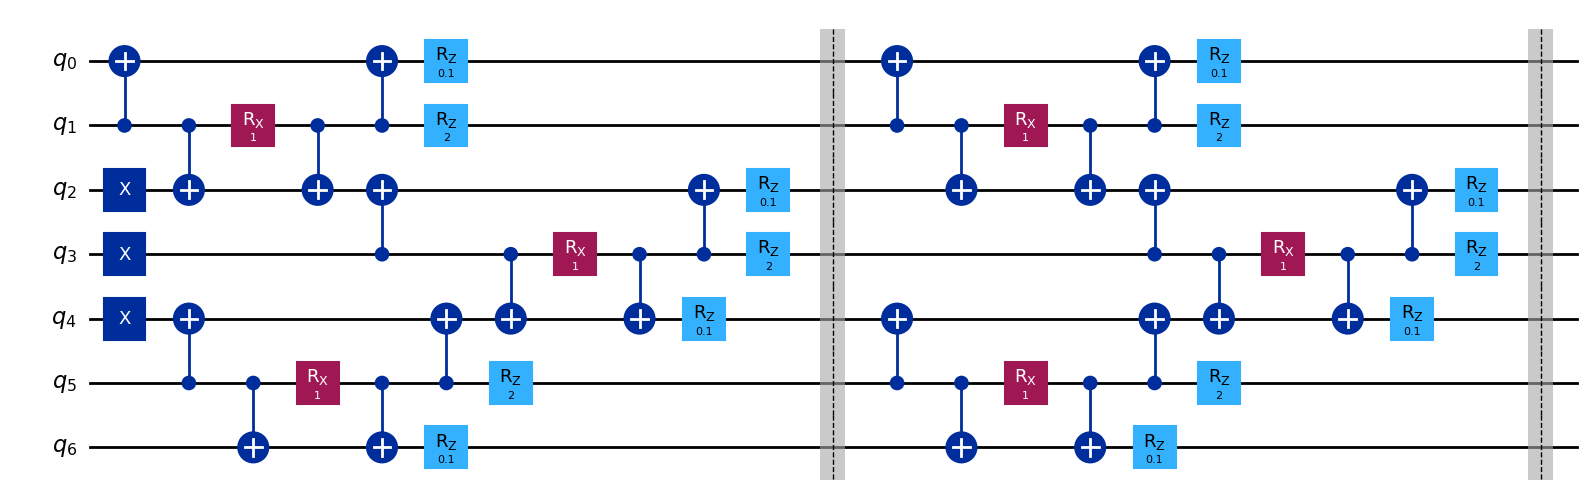

In [7]:
circs_arr[2].draw(output="mpl")